1. Считываем данные

In [23]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

data = pd.read_csv('myAnimeList_top1000.csv', sep=';')

2. Опишем данные

In [24]:
# Первые 5 строк из датасета
data.head()

,title_english,synopsis,year,score,genres
0,Frieren: Beyond Journey's End,During their decade-long quest to defeat the D...,2023.0,9.37,"Adventure, Drama, Fantasy"
1,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,2009.0,9.09,"Action, Adventure, Drama, Fantasy"
2,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...,2011.0,9.07,"Drama, Sci-Fi, Suspense"
3,Gintama Season 4,"Gintoki, Shinpachi, and Kagura return as the f...",2015.0,9.06,"Action, Comedy, Sci-Fi"
4,Attack on Titan Season 3 Part 2,Seeking to restore humanity's diminishing hope...,2019.0,9.05,"Action, Drama, Suspense"


In [25]:
# Информация о столбцах
# Мы видим, что встречаются пустые значения
# Больше всего пустых значений в столбце 'year'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_english  863 non-null    object 
 1   synopsis       997 non-null    object 
 2   year           557 non-null    float64
 3   score          1000 non-null   float64
 4   genres         974 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [26]:
# Приведенные данные не содержат каких-либо заметных аномалий.
# Однако не для каждого тайтла в данных указан год, название, краткий обзор
# Не у каждого тайтла указаны жанры
data.describe()

,year,score
count,557.000000,1000.00000
mean,2012.712747,8.16392
std,9.556726,0.28258
min,1970.000000,7.81000
25%,2008.000000,7.93000
50%,2015.000000,8.11000
75%,2020.000000,8.32000
max,2024.000000,9.37000


3. Препроцессинг текстовых данных

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
set_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kalyuzhin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kalyuzhin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kalyuzhin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
def preprocess_text(text: str) -> list[str]:
    if isinstance(text, float):
        return ''
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in set_stopwords]
    return ' '.join(words)


cleaned_synopsis = data['synopsis'].apply(preprocess_text)

4. Самые часто встречающиеся слова

In [29]:
def get_frequnt_words(texts):
    words = ' '.join(texts).split()
    word_freq = pd.Series(words).value_counts()
    return word_freq.nlargest(20)


get_frequnt_words(cleaned_synopsis)

written    831
mal        828
rewrite    823
one        459
however    435
school     390
new        344
world      340
life       303
time       234
must       232
high       228
day        211
two        210
friends    185
become     169
years      169
find       162
first      161
young      160
Name: count, dtype: int64

В список стоп-слов следует добавить буквенное написание цифр, а также глаголы по типу 'must'

In [30]:
additional_stopwords = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'must']
for word in additional_stopwords:
    set_stopwords.add(word)
cleaned_synopsis = data['synopsis'].apply(preprocess_text)

5. Самые часто встречающиеся слова у ТОП-100 постов по кол-ву лайков

In [31]:
action_anime = data[data['genres'].str.contains('Action', na=False)]
cleaned_action_synopsis = action_anime['synopsis'].apply(preprocess_text)
get_frequnt_words(cleaned_action_synopsis)

written       311
mal           310
rewrite       309
however       164
world         160
new           132
war            97
life           90
city           87
years          85
battle         81
power          75
known          73
mysterious     71
time           70
fight          69
become         69
day            64
man            62
young          61
Name: count, dtype: int64

6. Визуализация самых часто встречающихся слов

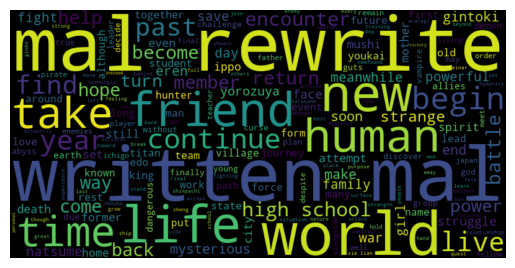

In [32]:
# Первые 100 тайтлов
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


top_anime = data.nlargest(100, 'score')
plot_wordcloud(top_anime['synopsis'].apply(preprocess_text))

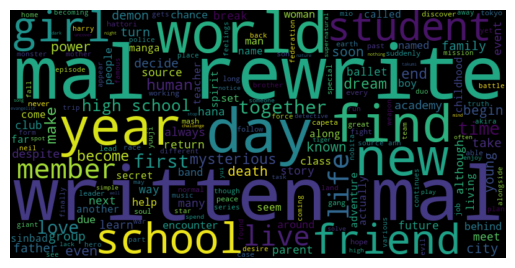

In [33]:
# Последние 100 тайтлов
bottom_anime = data.nsmallest(100, 'score')
plot_wordcloud(bottom_anime['synopsis'].apply(preprocess_text))